Custom Loss: 342843.0468664746
Mean Squared Error: 36507.260604519266
R-squared: 0.6697110139710364


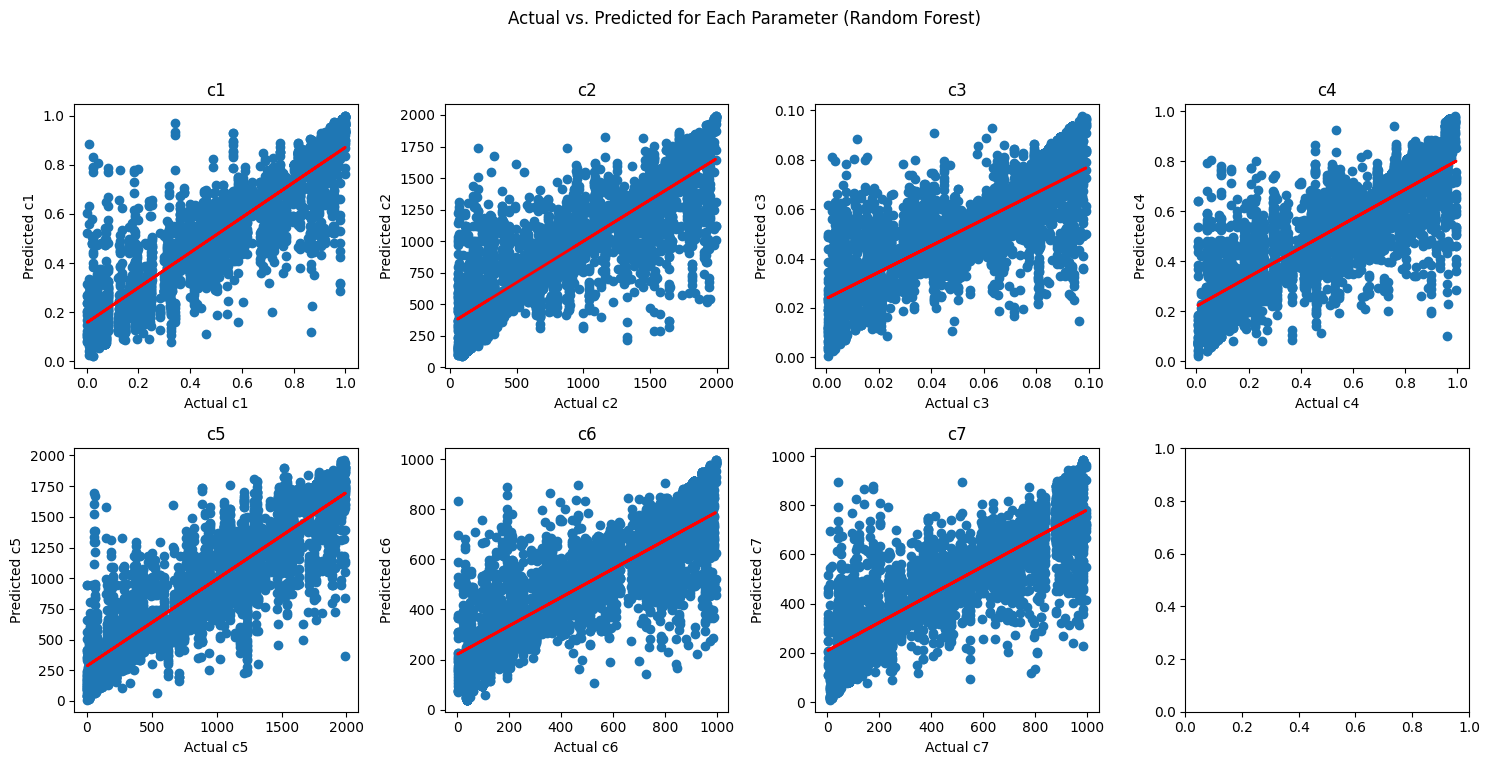

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load X (features) and y (target variable) from CSV files
X_file_path = 'MODEL_DATA/NEWDATA/newData_combined_FD.csv'
y_file_path = 'MODEL_DATA/NEWDATA/newData_expanded_realHardParam.csv'

# Read X and y data from CSV files
X = pd.read_csv(X_file_path)
y = pd.read_csv(y_file_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom Loss Function
def custom_loss(y_true, y_pred):
    # Define weights based on the importance of each parameter
    weights = np.array([1.0, 10, 1.0, 1.0, 10, 10, 5])
    squared_diff = (y_true - y_pred) ** 2
    weighted_squared_diff = squared_diff * weights
    return np.mean(weighted_squared_diff)

# Create and train the Random Forest Regression model with custom loss function
rf_model_custom_loss = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_custom_loss.fit(X_train, y_train)

# Make predictions on the test set
y_pred_custom_loss = rf_model_custom_loss.predict(X_test)

# Evaluate the model using the custom loss function
custom_loss_value = custom_loss(y_test.values, y_pred_custom_loss)
print(f'Custom Loss: {custom_loss_value}')

# Additional Evaluation Metrics
mse = mean_squared_error(y_test, y_pred_custom_loss)
r2 = r2_score(y_test, y_pred_custom_loss)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize actual vs. predicted values for each column in y with best-fit lines in a single figure
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Actual vs. Predicted for Each Parameter (Random Forest)')

# Iterate up to the minimum of the number of columns and 7
for i, ax in enumerate(axes.flatten()):
    if i < y.shape[1]:  # Check if i is within the number of columns
        # Scatter plot
        ax.scatter(y_test.iloc[:, i], y_pred_custom_loss[:, i])
        ax.set(xlabel=f'Actual c{i+1}', ylabel=f'Predicted c{i+1}')
        ax.set_title(f'c{i+1}')

        # Fit a linear regression line
        lr = LinearRegression()
        lr.fit(y_test.iloc[:, i].values.reshape(-1, 1), y_pred_custom_loss[:, i])
        line = lr.predict(y_test.iloc[:, i].values.reshape(-1, 1))

        # Plot the regression line
        ax.plot(y_test.iloc[:, i], line, color='red', linewidth=2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [6]:
# Predicted values for specific conditions using linear regression lines
conditions = [0.5, 1300, 2.3e-14, 0.075, 773.18, 1039.37, 73.94]

for i, condition in enumerate(conditions):
    # Fit a linear regression model
    lr = LinearRegression()
    lr.fit(y_test.iloc[:, i].values.reshape(-1, 1), y_pred_custom_loss[:, i])

    # Predict using the linear regression model
    predicted_value = lr.predict(np.array([[condition]]))

    # Print the result
    print(f'Predicted c{i + 1}: {predicted_value[0]}')


Predicted c1: 0.5139736735702103
Predicted c2: 1195.916454402472
Predicted c3: 0.023765172822753193
Predicted c4: 0.2637934652246432
Predicted c5: 831.7697967468094
Predicted c6: 811.5048884934508
Predicted c7: 251.41025788472933
